### Task: You will complete the third of three practical application assignments for this program.
1. KNN
2. LOGISTICRegression
3. DecisionTree
4. SVM

### Data

Bank Marketing: https://archive.ics.uci.edu/dataset/222/bank+marketing


Dataset Information
Additional Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error as ms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as sf
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score as score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import accuracy_score, auc
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree, export_text
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.svm import SVC, SVR
import time

The data is loaded below.

In [2]:
mkg = pd.read_csv('bank/bank.csv', sep = ';')

In [3]:
#bank data
mkg.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
mkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
mkg = mkg.dropna()
mkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
X = mkg.drop('y', axis =1)
mkg['y'] = np.where(mkg['y'] =='yes',1,0)
y = mkg['y']

In [7]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Data Processing

In [9]:
# ct = make_column_transformer(
# (StandardScaler(),make_column_selector(dtype_include=np.number)),  # all numerical columns
# (OneHotEncoder(drop = 'if_binary'),make_column_selector(dtype_include=object))  # all categorical columns
# )  # all categorical columns

In [10]:
ct = make_column_transformer(
(StandardScaler(),make_column_selector(dtype_include=np.number)),  # all numerical columns
(OneHotEncoder(),['job', 'marital', 'education','default', 'housing', 'loan', 'contact','month','poutcome'])  # all categorical columns except y
)  # all categorical columns

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


In [12]:
ct.fit_transform(X)

array([[-1.05626965,  0.12107186,  0.37405206, ...,  0.        ,
         0.        ,  1.        ],
       [-0.77258281,  1.1186443 , -0.59602646, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58345826, -0.02414438,  0.01027262, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.49691189, -0.37472364,  0.37405206, ...,  0.        ,
         0.        ,  1.        ],
       [-1.24539421, -0.09492484, -1.20232553, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.26760226, -0.09525714, -1.56610497, ...,  1.        ,
         0.        ,  0.        ]])

In [13]:
ct.get_feature_names_out()

array(['standardscaler__age', 'standardscaler__balance',
       'standardscaler__day', 'standardscaler__duration',
       'standardscaler__campaign', 'standardscaler__pdays',
       'standardscaler__previous', 'onehotencoder__job_admin.',
       'onehotencoder__job_blue-collar',
       'onehotencoder__job_entrepreneur', 'onehotencoder__job_housemaid',
       'onehotencoder__job_management', 'onehotencoder__job_retired',
       'onehotencoder__job_self-employed', 'onehotencoder__job_services',
       'onehotencoder__job_student', 'onehotencoder__job_technician',
       'onehotencoder__job_unemployed', 'onehotencoder__job_unknown',
       'onehotencoder__marital_divorced',
       'onehotencoder__marital_married', 'onehotencoder__marital_single',
       'onehotencoder__education_primary',
       'onehotencoder__education_secondary',
       'onehotencoder__education_tertiary',
       'onehotencoder__education_unknown', 'onehotencoder__default_no',
       'onehotencoder__default_yes', 'oneh

In [14]:
X = pd.DataFrame(ct.fit_transform(X),columns= ct.get_feature_names_out())

In [15]:
X

,standardscaler__age,standardscaler__balance,standardscaler__day,standardscaler__duration,standardscaler__campaign,standardscaler__pdays,standardscaler__previous,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,...,onehotencoder__month_jun,onehotencoder__month_mar,onehotencoder__month_may,onehotencoder__month_nov,onehotencoder__month_oct,onehotencoder__month_sep,onehotencoder__poutcome_failure,onehotencoder__poutcome_other,onehotencoder__poutcome_success,onehotencoder__poutcome_unknown
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4518,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4519,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
X_train

,standardscaler__age,standardscaler__balance,standardscaler__day,standardscaler__duration,standardscaler__campaign,standardscaler__pdays,standardscaler__previous,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,...,onehotencoder__month_jun,onehotencoder__month_mar,onehotencoder__month_may,onehotencoder__month_nov,onehotencoder__month_oct,onehotencoder__month_sep,onehotencoder__poutcome_failure,onehotencoder__poutcome_other,onehotencoder__poutcome_success,onehotencoder__poutcome_unknown
1316,-1.056270,0.568683,0.131532,-0.538669,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
727,-1.150832,0.500561,-0.596026,-0.665676,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1241,-1.812768,-0.290319,-1.687365,-0.423208,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1615,-0.678021,-0.334183,0.252792,-0.484787,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
304,1.402350,-0.355450,1.101611,-0.357780,-0.255231,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,-0.583458,-0.414600,-1.081066,-0.026792,-0.255231,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2833,-0.299771,-0.452150,0.374052,-0.199984,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3859,1.213225,1.023606,0.616572,-0.369326,0.066368,-0.407218,-0.320413,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,-0.678021,-0.396988,0.737832,0.473539,0.387967,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
y_train

1316    0
727     0
1241    0
1615    0
304     0
       ..
1969    0
2833    0
3859    0
432     0
3845    0
Name: y, Length: 3616, dtype: int64

Duration: 0.4020509719848633
Accuracy_train: 0.9233960176991151
Accuracy_test: 0.8795580110497238
[[771  22]
 [ 87  25]]
[[771  22]
 [ 87  25]]


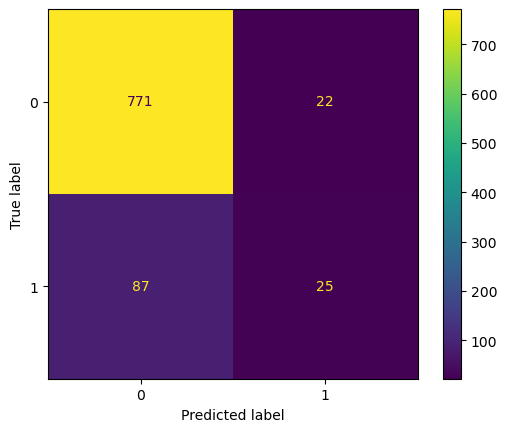

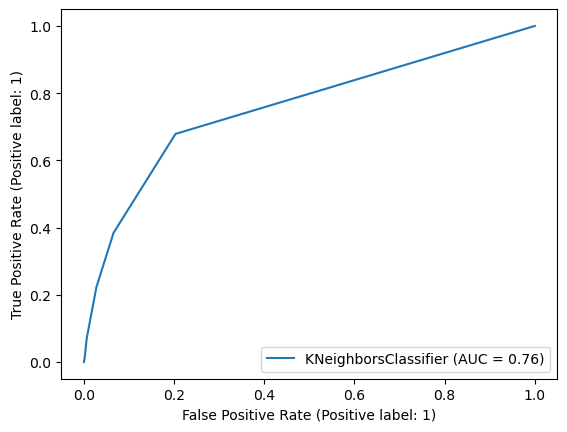

In [19]:
### 1) KNeighborsClassifier



start = time.time()
knn_model = KNeighborsClassifier().fit(X_train,y_train)
acc_train = accuracy_score(knn_model.predict(X_train), y_train)
acc_test = accuracy_score(knn_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print(confusion_matrix(y_test, knn_model.predict(X_test)))

print(confusion_matrix(y_test, knn_model.predict(X_test)))


# Confusion Matrix Display
cm = confusion_matrix(y_test, knn_model.predict(X_test), labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(knn_model, X_test, y_test)



Duration: 0.06445789337158203
Accuracy_train: 0.9065265486725663
Accuracy_test: 0.8972375690607735
[[779  14]
 [ 79  33]]


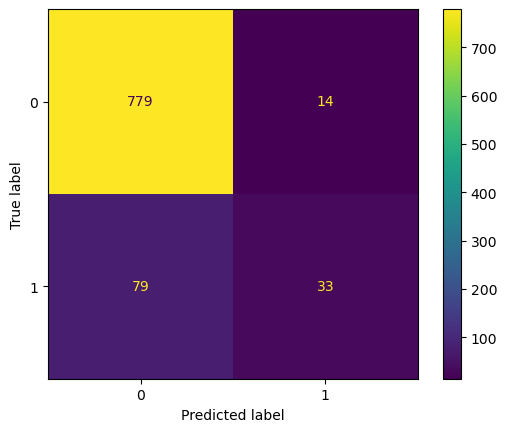

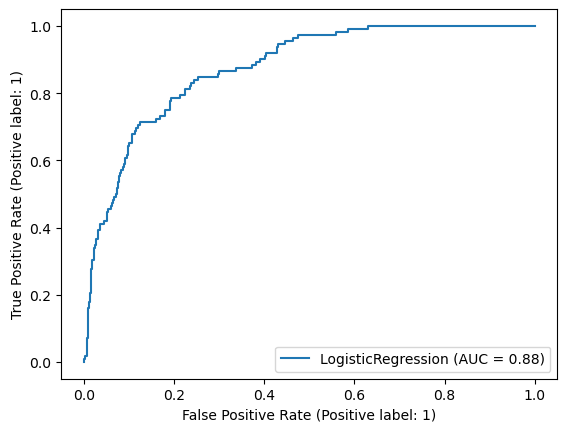

In [20]:
### 2) LogisticRegression



start = time.time()
lg_model = LogisticRegression().fit(X_train,y_train)
acc_train = accuracy_score(lg_model.predict(X_train), y_train)
acc_test = accuracy_score(lg_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print(confusion_matrix(y_test, lg_model.predict(X_test)))


## Confusion Matrix Display
cm = confusion_matrix(y_test, lg_model.predict(X_test), labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lg_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(lg_model, X_test, y_test)



Duration: 0.016196250915527344
Accuracy_train: 0.8877212389380531
Accuracy_test: 0.8629834254143647
[[747  46]
 [ 78  34]]


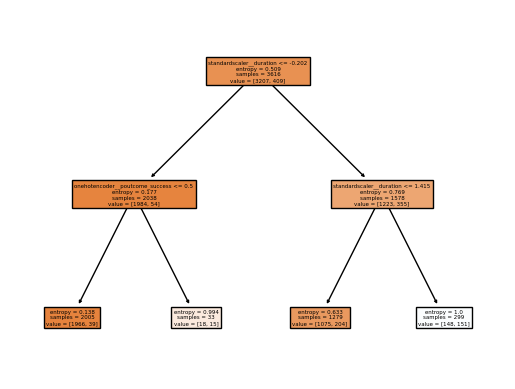

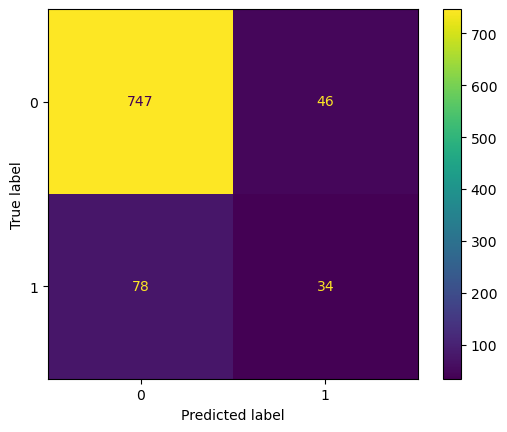

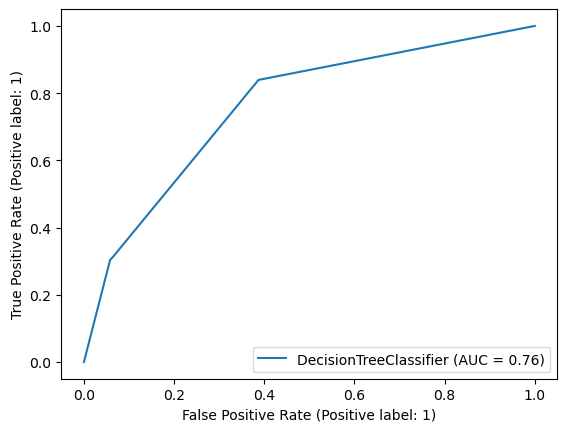

In [31]:
### 3) DecisionTreeClassifier



start = time.time()
dt_model = DT(criterion='entropy', max_depth = 2).fit(X_train,y_train)
acc_train = accuracy_score(dt_model.predict(X_train), y_train)
acc_test = accuracy_score(dt_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print(confusion_matrix(y_test, dt_model.predict(X_test)))
plot_tree(dt_model, filled = True, feature_names = X.columns)


## Confusion Matrix Display
cm = confusion_matrix(y_test, dt_model.predict(X_test), labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)



Duration: 0.5381333827972412
Accuracy_train: 0.9228429203539823
Accuracy_test: 0.8861878453038674
[[781  12]
 [ 91  21]]


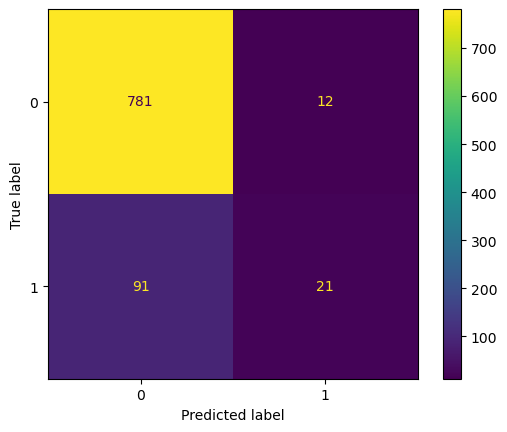

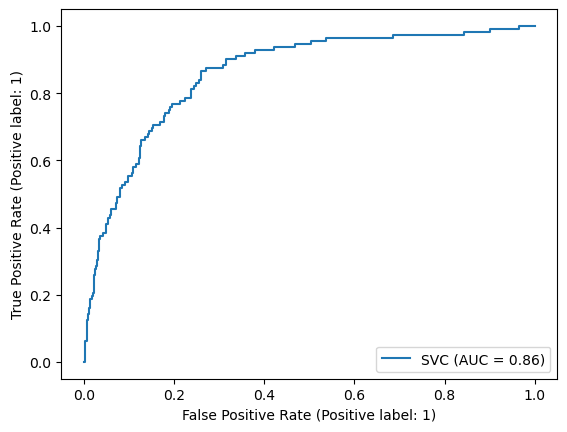

In [28]:
### 4) SVM



start = time.time()
svm_model = SVC(kernel='rbf', degree=3, gamma='scale').fit(X_train,y_train)
acc_train = accuracy_score(svm_model.predict(X_train), y_train)
acc_test = accuracy_score(svm_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print(confusion_matrix(y_test, svm_model.predict(X_test)))


## Confusion Matrix Display
cm = confusion_matrix(y_test, svm_model.predict(X_test), labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svm_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)



## Comparision

In [30]:
res_dict = {'model': ['KNN', 'Logistic Regression', 'DecisionTree', 'SVC'],
           'train score': [0.92, 0.90, 0.88,0.92],
           'test score': [0.87, 0.89, 0.86,0.88],
           'average fit time': [0.40, 0.06, 0.01,0.53]}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

,train score,test score,average fit time
model,,,
KNN,0.92,0.87,0.40
Logistic Regression,0.90,0.89,0.06
DecisionTree,0.88,0.86,0.01
SVC,0.92,0.88,0.53


## Findings
1) The accuracy score are very close to each other for all 4 classifiers, Logistic refression and DecisionTree took the lower the fitting time.
2) Logistic Regression is the best with highest test score and relatively less fitting time.
3) DecisonTree is good for the logic interpreation. 